In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import praw
import matplotlib.pyplot as plt
import seaborn as sns
import config

from sklearn import preprocessing


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/reddit/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Visualizing relationships in subreddits and redditors 

In [2]:
def word_counter(dataframe):
    """function that count all words in a comment within a dataframe
    and a outputs that as a new column"""
    words_in_comment = []
    for comment in dataframe['body']:
        words = comment.split()
        words_in_comment.append(len(words))
    dataframe['word_num'] = words_in_comment
    return dataframe

### Analyzing the most popular and the most unpopular redditors in r/dataisbeautiful's "hot" 
Loading the score and number of comments of the redditors in the 100 hottest r/dataisbeautiful submissions. 

In [3]:
# loading the top 100 submissions dataframe 

hot_redditors = pd.read_csv('top100_top_redditors_2020-05-10.csv', index_col=0)

# loading the 2 dataframe with the top 25 most un/popular redditors 

positive = pd.read_csv('positive_redditors_2020-05-10.csv', index_col=0)
positive['pos_or_neg'] = 1
negative = pd.read_csv('negative_redditors_2020-05-10.csv', index_col=0)
negative['pos_or_neg'] = 0

In [4]:
# merging positive and negative for comparability 
pos_and_neg = positive.reset_index().merge(negative.reset_index(),how='outer')

In [5]:
pos_and_neg['created'].iloc[0]

'2016-01-18 06:50:34'

In [6]:
pos_and_neg

,index,created,link_karma,comment_karma,pos_or_neg
0,zkgkilla,2016-01-18 06:50:34,4377,9819,1
1,strumthebuilding,2012-10-13 17:40:00,218,6675,1
2,steevie265,2018-07-11 05:40:43,38,3145,1
3,zipflop,2013-02-12 11:51:37,12676,25675,1
4,JPAnalyst,2018-02-15 04:56:39,27007,35139,1
5,AAAbbasi786,2020-04-26 05:17:08,10787,2614,1
6,chamomileinyohood,2019-01-29 10:59:52,7427,6926,1
7,mochizuki,2012-01-23 19:09:01,11795,25267,1
8,BingedrinkerX,2015-03-24 09:42:30,94,1396,1
9,drea2,2017-05-27 13:38:43,3683,27669,1


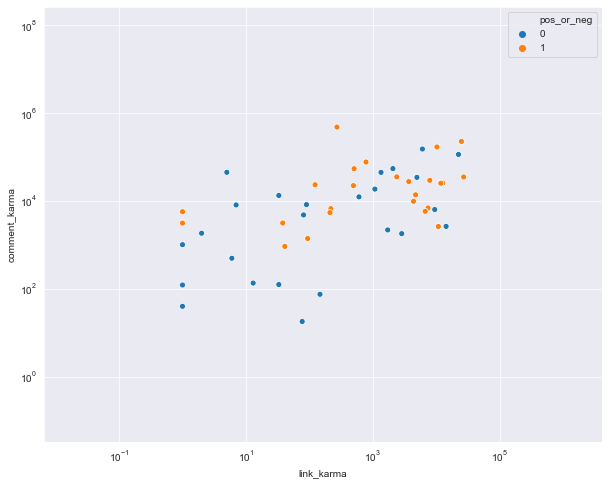

In [11]:
plt.figure(figsize=(10,8))
plt.xscale('log')
plt.yscale('log') 
sns.set_style('darkgrid')
sns.scatterplot(data=pos_and_neg, 
                x='link_karma', 
                y='comment_karma', 
                hue='pos_or_neg')

In [28]:
# regplot function
def reg_plotter(dataframe, x_value, y_value):
    plt.figure(figsize=(10,(8)))
    sns.set_style('darkgrid')
    sns.regplot(data=dataframe, x=x_value, y=y_value)

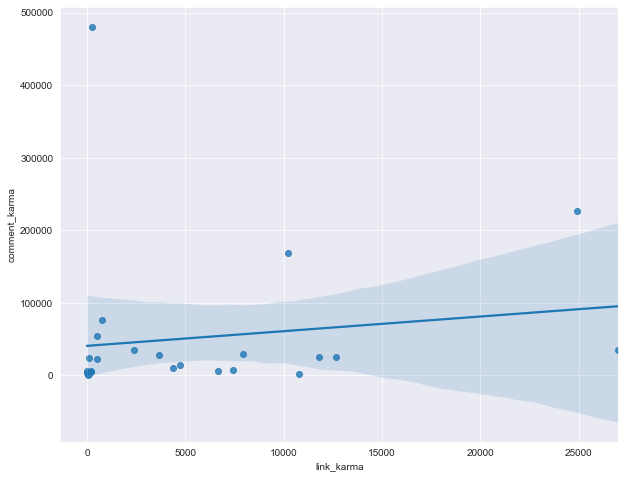

In [29]:
reg_plotter(positive, 'link_karma', 'comment_karma')

In [6]:
positive

,created,link_karma,comment_karma
zkgkilla,2016-01-18 06:50:34,4377,9819
strumthebuilding,2012-10-13 17:40:00,218,6675
steevie265,2018-07-11 05:40:43,38,3145
zipflop,2013-02-12 11:51:37,12676,25675
JPAnalyst,2018-02-15 04:56:39,27007,35139
AAAbbasi786,2020-04-26 05:17:08,10787,2614
chamomileinyohood,2019-01-29 10:59:52,7427,6926
mochizuki,2012-01-23 19:09:01,11795,25267
BingedrinkerX,2015-03-24 09:42:30,94,1396
drea2,2017-05-27 13:38:43,3683,27669


In [60]:
top_25['year'] = top_25.set_index('created').index.year

In [62]:
top_25.sort_values(by='year')

,created,link_karma,comment_karma,total_karma,year
wozer,2007-08-28 05:16:44,7818,30410,38228,2007
SdifOdh,2012-04-11 07:03:13,8847,35717,44564,2012
EviIution,2012-12-21 18:05:39,158,3128,3286,2012
MazPA,2013-12-19 08:32:02,21696,34617,56313,2013
Jandolino,2013-05-08 04:34:15,422,20670,21092,2013
YeppImNaked,2013-08-21 05:21:47,1392,4892,6284,2013
zieji,2013-04-18 07:27:17,236,5797,6033,2013
erfrischungsgetraenk,2013-01-09 01:02:16,11318,10455,21773,2013
s0nderv0gel,2014-09-27 16:25:30,47204,92826,140030,2014
FlyingLowSH,2014-03-14 18:13:49,51406,238602,290008,2014


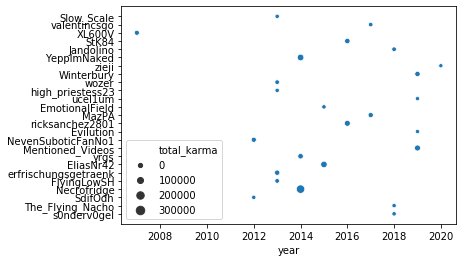

In [75]:
# creating interpretable plots 
year = top_25['year'].sort_values()
redditors = top_25.index
karma = top_25['total_karma']
sns.scatterplot(x=year,y=redditors,size=karma)

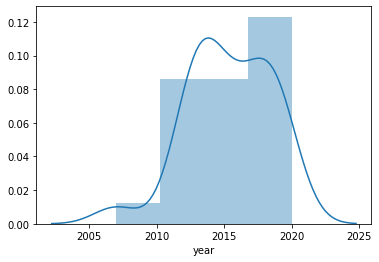

In [82]:
# showing the distribution of the account creations over the years 
sns.distplot(year)

In [16]:
# defining a kde plot function 
def kde_plotter(dataframe):
    """plot a kde plot showing distribution of link karma to comment karma"""
    plt.figure(figsize=(10,(8)))
    sns.set_style('darkgrid')
    sns.kdeplot(dataframe['link_karma'], shade=True, label='link karma')
    sns.kdeplot(dataframe['comment_karma'], shade=True, label= 'comment karma')

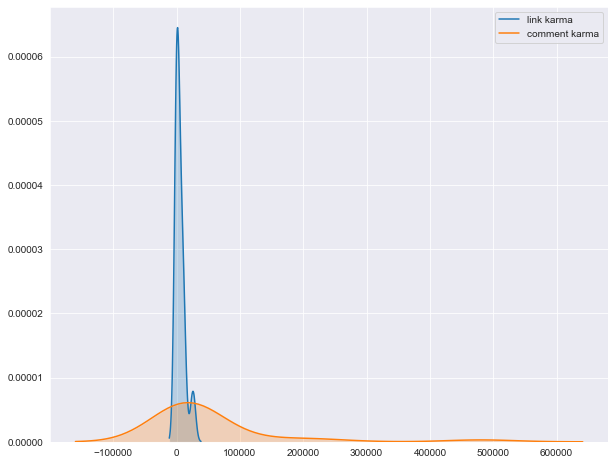

In [17]:
kde_plotter(positive)

In [20]:
frame_list =[positive, negative]

In [22]:
def test_kde_plotter(frame_list):
    """plot a kde plot showing distribution of link karma to comment karma"""
    plt.figure(figsize=(10,(8)))
    sns.set_style('darkgrid')
    for num, frame in enumerate(frame_list):
        sns.kdeplot(frame['link_karma'], shade=True, label=f'link karma_{num}')
        sns.kdeplot(frame['comment_karma'], shade=True, label= f'comment karma_{num}')

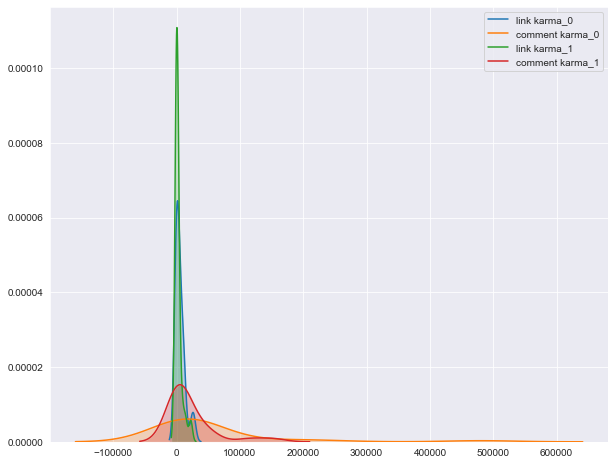

In [23]:
test_kde_plotter(frame_list)

### KDE/Distplot interpretation:
- there's a smaller distribution of link karma and, generally, most of the karma is in the region of 50k 
- comment karma is much more distributed and quite a few have achieved high karma numbers through their comments 

### top 25 weekly redditors observation
- can there be found general types within the top 25 redditors?
    - how many are "mostly commenting"? Are there redditors who mostly submit in the top? 
    - are there age groups? how would you group them? 
- there are redditors who almost exclusively comment without sharing links/creating submissions on their own 

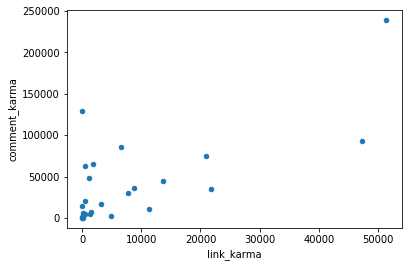

In [25]:
top_25.plot(x='link_karma', y='comment_karma', kind='scatter')

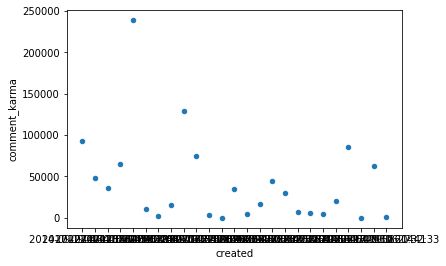

In [26]:
top_25.plot(x='created', y='comment_karma', kind='scatter')

In [28]:
top_reds = pd.read_csv('top_de_redditors_1May.csv', index_col=0)

In [33]:
top_reds.sort_values(by='score', ascending=False).head(25)

,num_comments,score
MannAusSachsen,17,1172
HuhuBiks,1,850
niklaszantner,1,661
schupfnudel_12,1,624
kleinerkathe,2,583
zuadfg,2,514
Blaukraut_Brautkleid,5,496
KasimirDD,6,453
Lasagsey,3,449
MRockXxx,2,424


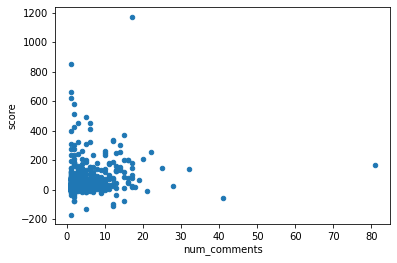

In [180]:
# plot that ish

top_reds.plot(x='num_comments', y='score', kind='scatter')

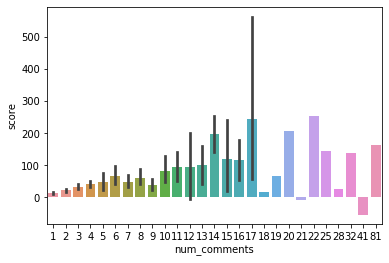

In [7]:
sns.barplot(data=top_reds, x=top_reds['num_comments'], y=top_reds['score'])

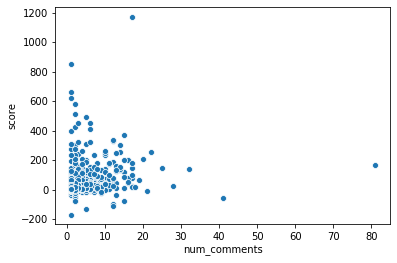

In [6]:
sns.scatterplot(data=top_reds, x=top_reds['num_comments'], y=top_reds['score'])

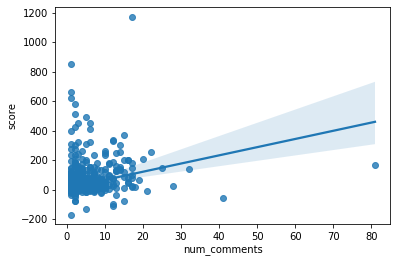

In [8]:
# in the regplot we see a slight correlation between number of comments and the score 
sns.regplot(data=top_reds, x=top_reds['num_comments'], y=top_reds['score'])

### removing outliers to get a clearer picture


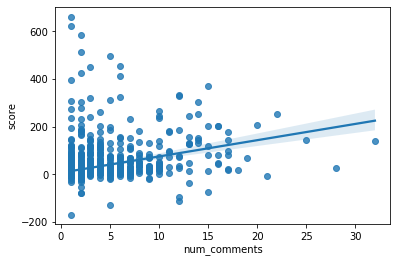

In [14]:
top_red_adjust = top_reds[(top_reds['num_comments'] < 40) & (top_reds['score'] < 800)]
sns.regplot(data=top_red_adjust, x=top_red_adjust['num_comments'], y=top_red_adjust['score'])

In [12]:
top_red_adjust.describe()

,num_comments,score
count,1897.000000,1897.000000
mean,2.406431,23.726410
std,2.885257,56.198211
min,1.000000,-168.000000
25%,1.000000,2.000000
50%,1.000000,6.000000
75%,2.000000,22.000000
max,32.000000,661.000000


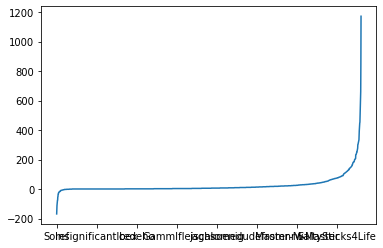

In [9]:
top_reds['score'].sort_values().plot()

In [54]:
top_reds['score'].sort_values()

Soref                -168
Disciplinaryspank    -129
hileutee             -111
Impulseps             -96
alphabetsong          -78
                     ... 
kleinerkathe          583
schupfnudel_12        624
niklaszantner         661
HuhuBiks              850
MannAusSachsen       1172
Name: score, Length: 1901, dtype: int64

### Question: what can be said about the redditors with the top/lowest %5 score?

In [56]:
# how many indices represent 5%? -> answer: 95 
top_reds['score'].sort_values().shape[0] * 0.05

95.05000000000001

In [62]:
worst_score = top_reds.sort_values(by='score').iloc[:96]
best_score = top_reds.sort_values(by='score').iloc[-96:]

In [22]:
# assumption: high comments to negative score -> troll account 

neg_score = top_reds[top_reds['score'] < 0]

In [32]:
pos_score = top_reds[top_reds['score'] > 200].sort_values(by='score')
pos_score

,num_comments,score
Polygnom,15,202
flingerdu,16,203
antifragile89,16,203
TheYang,4,205
Fatkuh,20,206
greikini,2,207
breaddrink,7,233
Patricia_W,2,234
ibosen,10,235
TheGermanKarlMarx,1,236


In [28]:
neg_score

,num_comments,score
Impulseps,12,-96
R1Lo2,6,-6
None,41,-53
itz_MaXii,1,-1
EnvironmentalBass1,7,-6
...,...,...
netznutzniesser,1,-6
lagerregal,2,-8
votiwo,9,-14
Wegwerf540,1,-1


### Learnings from looking at negative accounts
- 0.9% of comments in 'top' r/de are made by deleted accounts -> how does that fare in 'new'?

In [30]:
top_reds.loc['None']['num_comments']/top_reds['num_comments'].sum()

0.00871413390010627

In [21]:
top_reds.loc['None']

num_comments    41
score          -53
Name: None, dtype: int64

In [17]:
top_reds[top_reds.index.isna()]

,num_comments,score


In [174]:
top_reds[top_reds['num_comments'] == top_reds['num_comments'].max()]

,num_comments,score
knuckles1995,81,165


In [175]:
top_reds[top_reds['score'] == top_reds['score'].max()]

,num_comments,score
MannAusSachsen,17,1172


In [176]:
top_reds[top_reds['score'] == top_reds['score'].min()]

,num_comments,score
Soref,1,-168


In [177]:
# reading in the author frames 
redditor = pd.read_csv('kotkaiser_redditor', index_col=0)

In [8]:
redditor = word_counter(redditor)

In [9]:
redditor

,body,score,created,word_num
0,"""Sach ma, wat macht dein Nachbar da?""\n\n""Ach,...",39,2020-04-27 16:42:28,18
1,Sollte das neue Outro von Arte Karambolage wer...,4,2020-04-27 16:15:49,8
2,"Glückwunsch, Bruder",8,2020-04-27 14:20:42,2
3,Who the fuck cares,-26,2020-04-27 08:33:33,4
4,"Sorry, bin kein Weeb",-26,2020-04-27 08:33:14,4
...,...,...,...,...
995,Bist immer herzlich willkommen auf /r/brote. D...,17,2020-03-25 16:51:59,12
996,"Nee, kann heute morgen nur mit Brotkot dienen",24,2020-03-25 16:21:39,8
997,"Ach ist eh zu spät. Jetzt wissen halt 3, 4 Leu...",3,2020-03-25 16:12:37,34
998,Jeder auf /r/de ist /u/kotkaiser außer dir,16,2020-03-25 16:04:36,7


In [22]:
# number of words to score 

def score_word_scatter(dataframe):
    x_axis = dataframe['score']
    y_axis = dataframe['word_num']
    sns.scatterplot(x_axis, y_axis)

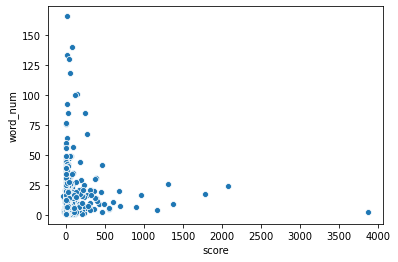

In [23]:
score_word_scatter(redditor)

In [20]:
# loading all comments within a submission 

comments = pd.read_csv('reddit_comments_2020-04-19', index_col=0)

In [24]:
comments = word_counter(comments)

In [30]:
comments

,body,score,author,created,word_num
0,Perlen des Lokaljournalismus...nur auf traurig...,1503,welcometobdude,1.587238e+09,8
1,Quelle: Hessisch-Niedersächsische Allgemeine v...,371,hummel124,1.587238e+09,5
2,Das sind ein bisschen mehr als 9 Millionen pro...,406,ohvalox,1.587240e+09,45
3,Hört sich nach einem militanten FC Bayern + Sp...,705,Deto9000,1.587238e+09,15
4,1. amazon chef bezos beutet seine arbeiter aus...,281,Samasoku,1.587248e+09,54
...,...,...,...,...,...
613,"Ach Brudi, Menschen als nutzlos bezeichnen mac...",3,MCBeathoven,1.587249e+09,40
614,"> Naja, der freie Markt mit Angebot und Nachfr...",1,Armleuchterchen,1.587307e+09,775
615,In einem gewissen Maße ist das nachvollziehbar...,1,Armleuchterchen,1.587308e+09,238
616,"Hat sich die Familie denn angesehen, wie man m...",1,IATAasdf,1.587251e+09,38


In [33]:
comments.groupby(['author', 'score'])['author'].count()

author             score
1_442xT_Cubed      0        2
                   1        4
2157345            7        2
5up3rK4m16uru      0        2
95DarkFireII       28       2
                           ..
wilisi             1        2
                   12       2
x0xk               4        2
yoaw               7        2
you_lost-the_game  3        2
Name: author, Length: 254, dtype: int64

In [34]:
comments.max()

body        „Jeff Bezos und gierig nach Geld?? Nein, das k...
score                                                    1503
created                                           1.58732e+09
word_num                                                  775
dtype: object

In [49]:
comments.groupby('author')['author'].count().sort_values()

author
you_lost-the_game       2
Principal_Insultant     2
gatonato                2
PlsTurnAround           2
PicturesOfRichard       2
                       ..
Brudi7                 10
REMagic42              12
Gysinator              13
mki_                   14
IATAasdf               44
Name: author, Length: 180, dtype: int64

In [52]:
comments.shape, comments['author'].unique().shape

((618, 5), (181,))

In [54]:
comments.groupby('author')['score'].count().sort_values()

author
you_lost-the_game       2
Principal_Insultant     2
gatonato                2
PlsTurnAround           2
PicturesOfRichard       2
                       ..
Brudi7                 10
REMagic42              12
Gysinator              13
mki_                   14
IATAasdf               44
Name: score, Length: 180, dtype: int64

In [128]:
comments.groupby('author').count().index

Index(['1_442xT_Cubed', '2157345', '5up3rK4m16uru', '95DarkFireII',
       'Achmedtheanimal', 'Adlersohn', 'AngelOfLilies', 'Armleuchterchen',
       'BierKippeMett', 'Bigluser',
       ...
       'tobit94', 'todbot1337', 'tzippy84', 'variablefighter_vf-1',
       'vinvancent', 'welcometobdude', 'wilisi', 'x0xk', 'yoaw',
       'you_lost-the_game'],
      dtype='object', name='author', length=180)

### How are the comments scores within a submission distributed?

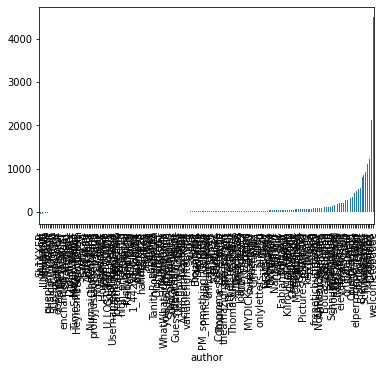

In [142]:
comments.groupby('author')['score'].sum().sort_values().plot(x='author', y='score',kind='bar')

In [125]:
# finding only those redditors where the accumulated score is > 2
reduced_comm = comments.groupby('author')['author'].count().sort_values()
reduced_comm = reduced_comm[reduced_comm >3]
author_filter = reduced_comm.index

In [117]:
# creating a more interesting plot with only the most intersting authors 

clean_comms = comments[comments['author'].isin(author_filter)]

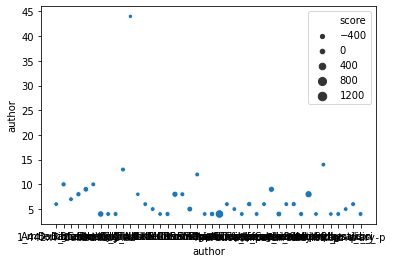

In [126]:
x = clean_comms.groupby('author').count().index
y = clean_comms.groupby('author')['author'].count()
size = clean_comms.groupby('author')['score'].sum()

sns.scatterplot(x=x, y=y, size=size)

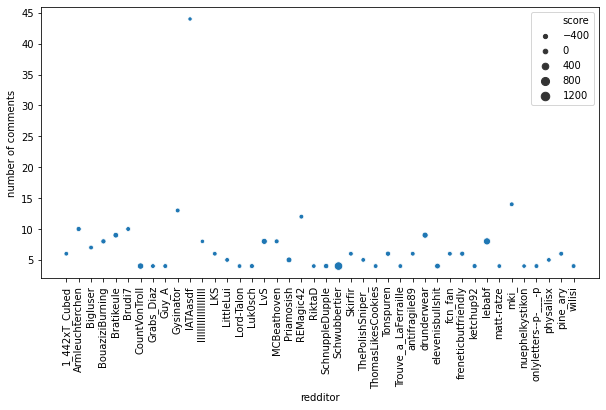

In [127]:
plt.figure(figsize=(10,5))
chart = sns.scatterplot(
    x=x,
    y=y,
    size=size
)
chart.set_xticklabels(x,rotation=90)
chart.set(xlabel='redditor', ylabel='number of comments')
plt.show()